In [90]:
# 45

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from IPython.display import Image
from os import system

from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

#import pydotplus
from statistics import median,mean

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score




In [92]:
data = pd.read_csv('bank-full.csv',na_values='unknown')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [93]:
data.shape

(45211, 17)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [95]:
data.contact.value_counts()

cellular     29285
telephone     2906
Name: contact, dtype: int64

In [96]:
data.describe()  # it only for numerical and object type variable not for categorical variable

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [97]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,1362.272058,1,0,cellular,5,8,261.0,1.0,-1.0,0.0,0,0


In [98]:
# clone 
df = data
df[[ 'job', 'marital', 'education',  'housing',
       'loan', 'contact', 'month','default','poutcome',
        'Target']]=df[[ 'job', 'marital', 'education',  'housing',
       'loan', 'contact', 'month','default','poutcome',
        'Target']].astype('category')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        44923 non-null  category
 2   marital    45211 non-null  category
 3   education  43354 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    32191 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   8252 non-null   category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [100]:
df.keys()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [101]:
df.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
Target           0
dtype: int64

In [102]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no


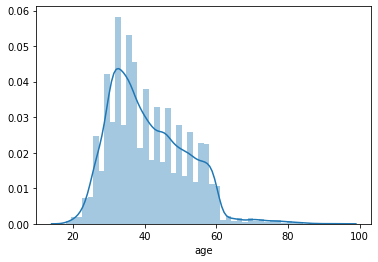

In [103]:
sns.distplot(df.age)


# filling missing values 

In [104]:
l=df.isnull().sum()
l

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
Target           0
dtype: int64

In [105]:
co=l[l>0].keys()
co

Index(['job', 'education', 'contact', 'poutcome'], dtype='object')

In [106]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')

In [107]:
df[co]=si.fit_transform(df[co])

In [108]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [109]:
# numerical distribution
fig,axe=plt.subplot(nrows =4 , ncols=2,figsize=(10,15))
axe = axe.flatten()
fig.tight_layout()
fig.show()
axe.flat()

AttributeError: 'AxesSubplot' object has no property 'nrows'

<Figure size 432x288 with 0 Axes>

In [110]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,no


# https://www.kite.com/python/answers/how-to-plot-pandas-dataframes-in-a-subplot-in-python

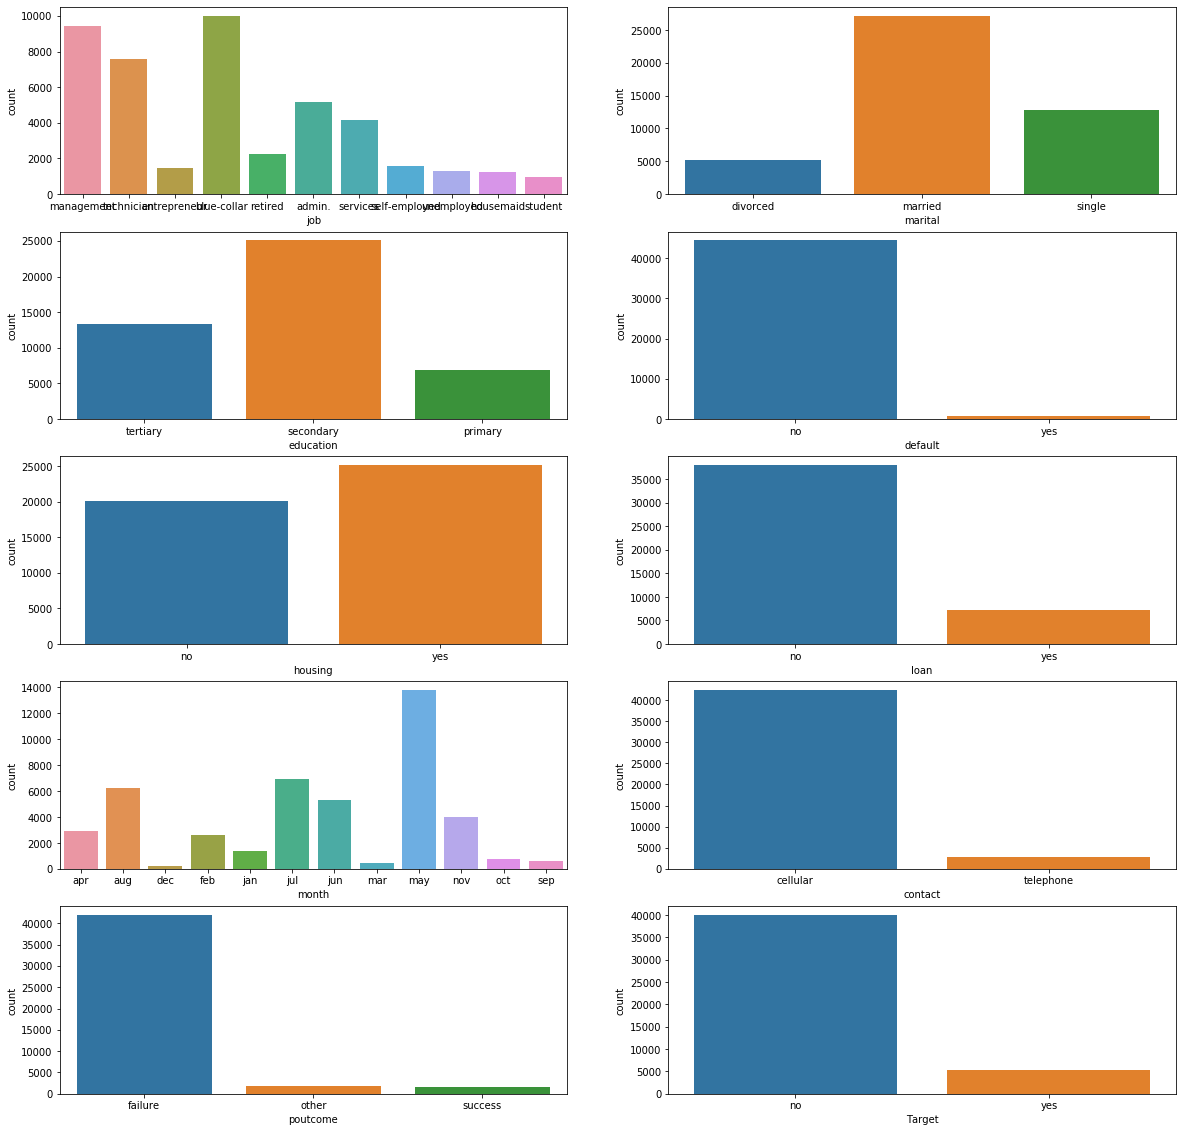

In [111]:

# categorical distribution use - countplot()
figure, axes = plt.subplots(5,2,figsize= (20,20))
axes = axes.flatten()           # imp

sns.countplot('job',data = df,ax=axes[0])
sns.countplot('marital',data = df,ax=axes[1])
sns.countplot('education',data = df,ax=axes[2])
sns.countplot('default',data = df,ax=axes[3])
sns.countplot('housing',data = df,ax=axes[4])
sns.countplot('loan',data = df,ax=axes[5])
sns.countplot('month',data = df,ax=axes[6])
sns.countplot('contact',data = df,ax=axes[7])
sns.countplot('poutcome',data = df,ax=axes[8])
sns.countplot('Target',data = df,ax=axes[9])




# inference from categorical plot




In [112]:
# unbalanced data


# measure of skewness of numerical features

In [113]:
df.skew().to_frame('Skewnwss of numerical ')

,Skewnwss of numerical
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


In [114]:
# right skewness +ve (mean>median)

# outliers - sns,boxpot()
is only for numerical features


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  object  
 2   marital    45211 non-null  category
 3   education  45211 non-null  object  
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  object  
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  object  
 16  Target     45211 non-null  category
dtypes: category(6), int64(7), object(4)
memory usage: 4.1+ MB


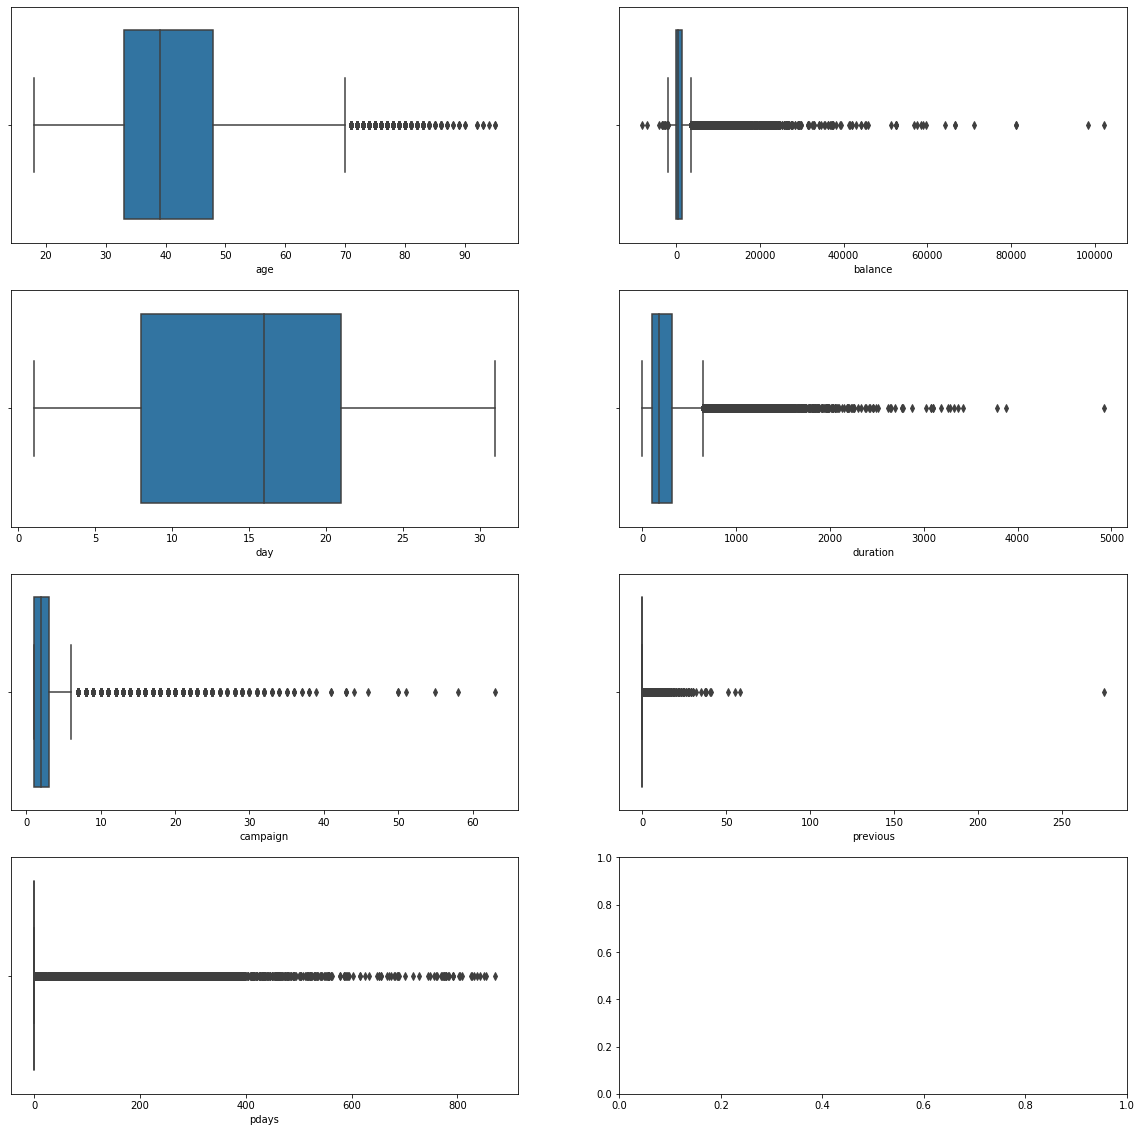

In [116]:
# categorical distribution use - countplot()
figure, axes = plt.subplots(4,2,figsize= (20,20))
axes = axes.flatten()           # imp

sns.boxplot(x='age',data=df,ax=axes[0])
sns.boxplot(x='balance',data=df,ax=axes[1])
sns.boxplot(x='day',data=df,ax=axes[2])
sns.boxplot(x='duration',data=df,ax=axes[3])
sns.boxplot(x='campaign',data=df,ax=axes[4])
sns.boxplot(x='previous',data=df,ax=axes[5])
sns.boxplot(x='pdays',data=df,ax=axes[6])





# converting the categoricaal to numerical

In [117]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,failure,no


In [118]:
df.dtypes

age             int64
job            object
marital      category
education      object
default      category
balance         int64
housing      category
loan         category
contact        object
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
Target       category
dtype: object

In [119]:
le = LabelEncoder()
df['marital']=le.fit_transform(df['marital']).astype('int')
df['default']=le.fit_transform(df['default']).astype('int')
df['loan']=le.fit_transform(df['loan']).astype('int')
df['housing']=le.fit_transform(df['housing']).astype('int')
df['month']=le.fit_transform(df['month']).astype('int')
df['education']=le.fit_transform(df['education']).astype('int')
df['Target']=le.fit_transform(df['Target']).astype('int')


In [121]:
df['poutcome']=le.fit_transform(df['poutcome']).astype('int')

In [122]:
df.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,cellular,5,8,261,1,-1,0,0,0
1,44,technician,2,1,0,29,1,0,cellular,5,8,151,1,-1,0,0,0
2,33,entrepreneur,1,1,0,2,1,1,cellular,5,8,76,1,-1,0,0,0
3,47,blue-collar,1,1,0,1506,1,0,cellular,5,8,92,1,-1,0,0,0


In [123]:
df[[ 'job', 'marital', 'education',  'housing',
       'loan', 'contact', 'month','default','poutcome',
        'Target']]=df[[ 'job', 'marital', 'education',  'housing',
       'loan', 'contact', 'month','default','poutcome',
        'Target']].astype('category')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


# Handling outlier with mean replacements

no records is deleted

In [125]:
import numpy as np

In [126]:
meanbal = float(df['balance'].mean())
df['balance']  = np.where(df['balance']>np.percentile(df['balance'],75),meanbal,df['balance'])



In [127]:
meandur = float(df['duration'].mean())
df['duration']  = np.where(df['duration']>np.percentile(df['duration'],75),meandur,df['duration'])

meancam = float(df['campaign'].mean())
df['campaign']  = np.where(df['campaign']>np.percentile(df['campaign'],75),meancam,df['campaign'])

meanpdays = float(df['pdays'].mean())
df['pdays']  = np.where(df['pdays']>np.percentile(df['pdays'],75),meanpdays,df['pdays'])

meanprevious = float(df['previous'].mean())
df['previous']  = np.where(df['previous']>np.percentile(df['previous'],75),meanprevious,df['previous'])



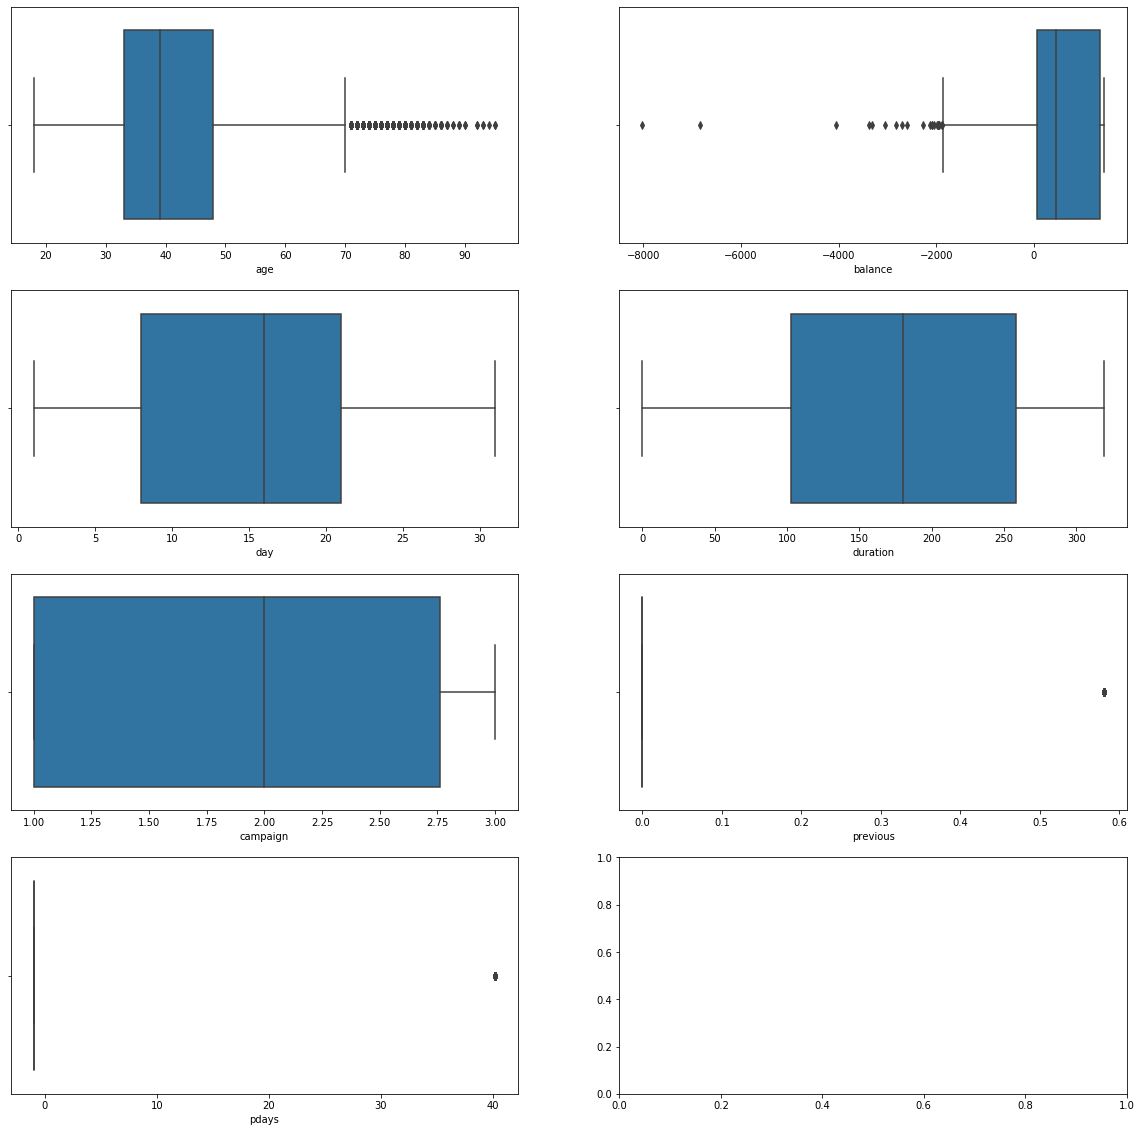

In [128]:
# categorical distribution use - countplot()
figure, axes = plt.subplots(4,2,figsize= (20,20))
axes = axes.flatten()           # imp

sns.boxplot(x='age',data=df,ax=axes[0])
sns.boxplot(x='balance',data=df,ax=axes[1])
sns.boxplot(x='day',data=df,ax=axes[2])
sns.boxplot(x='duration',data=df,ax=axes[3])
sns.boxplot(x='campaign',data=df,ax=axes[4])
sns.boxplot(x='previous',data=df,ax=axes[5])
sns.boxplot(x='pdays',data=df,ax=axes[6])





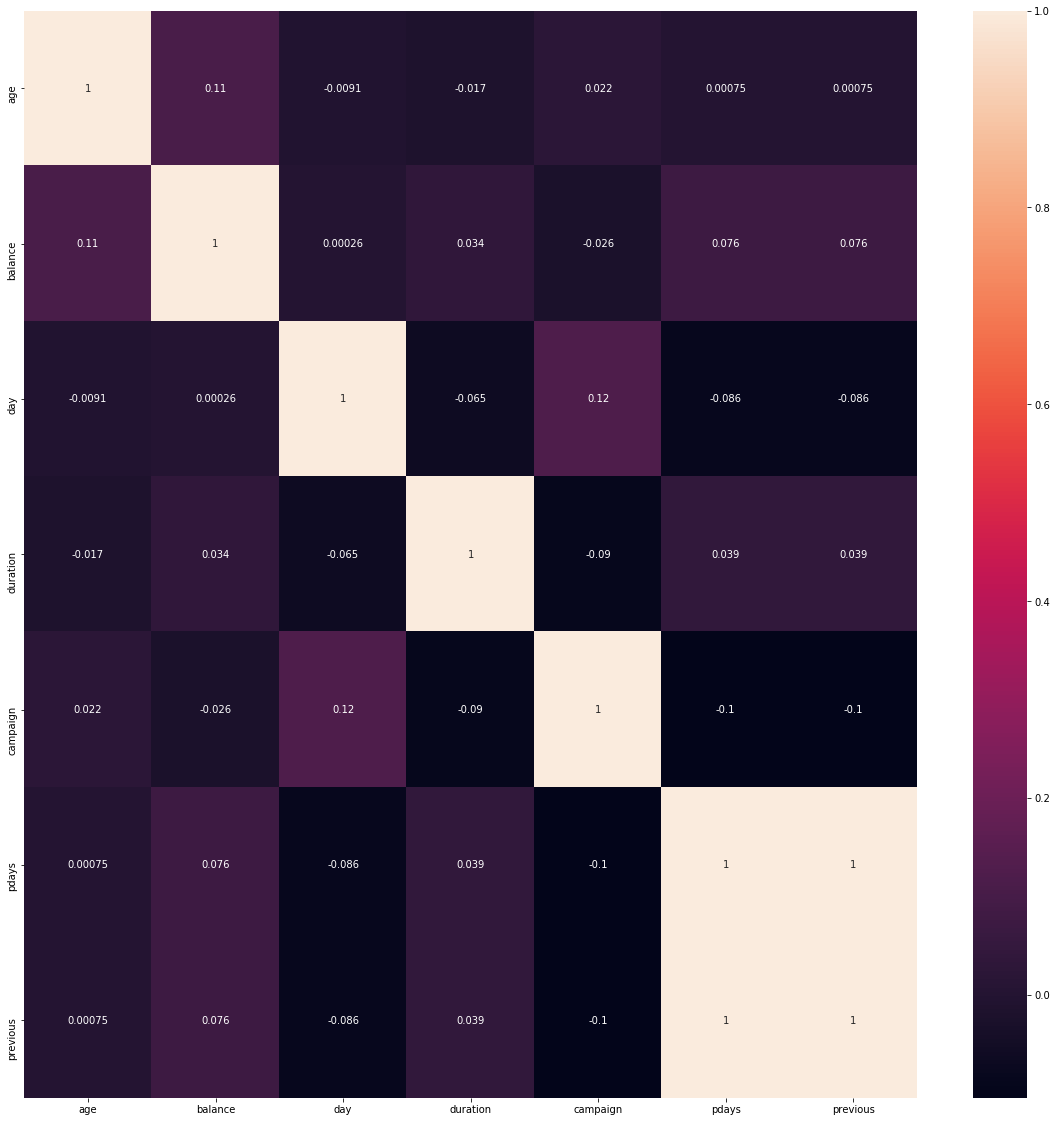

In [129]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [130]:
df2=df.drop(['job','education','contact','duration','pdays','day','month'],axis=1)
df2.head()

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,0,0
1,44,2,0,29.000000,1,0,1.0,0.0,0,0
2,33,1,0,2.000000,1,1,1.0,0.0,0,0
3,47,1,0,1362.272058,1,0,1.0,0.0,0,0
4,33,2,0,1.000000,0,0,1.0,0.0,0,0


# pairplot for multivariate analysis

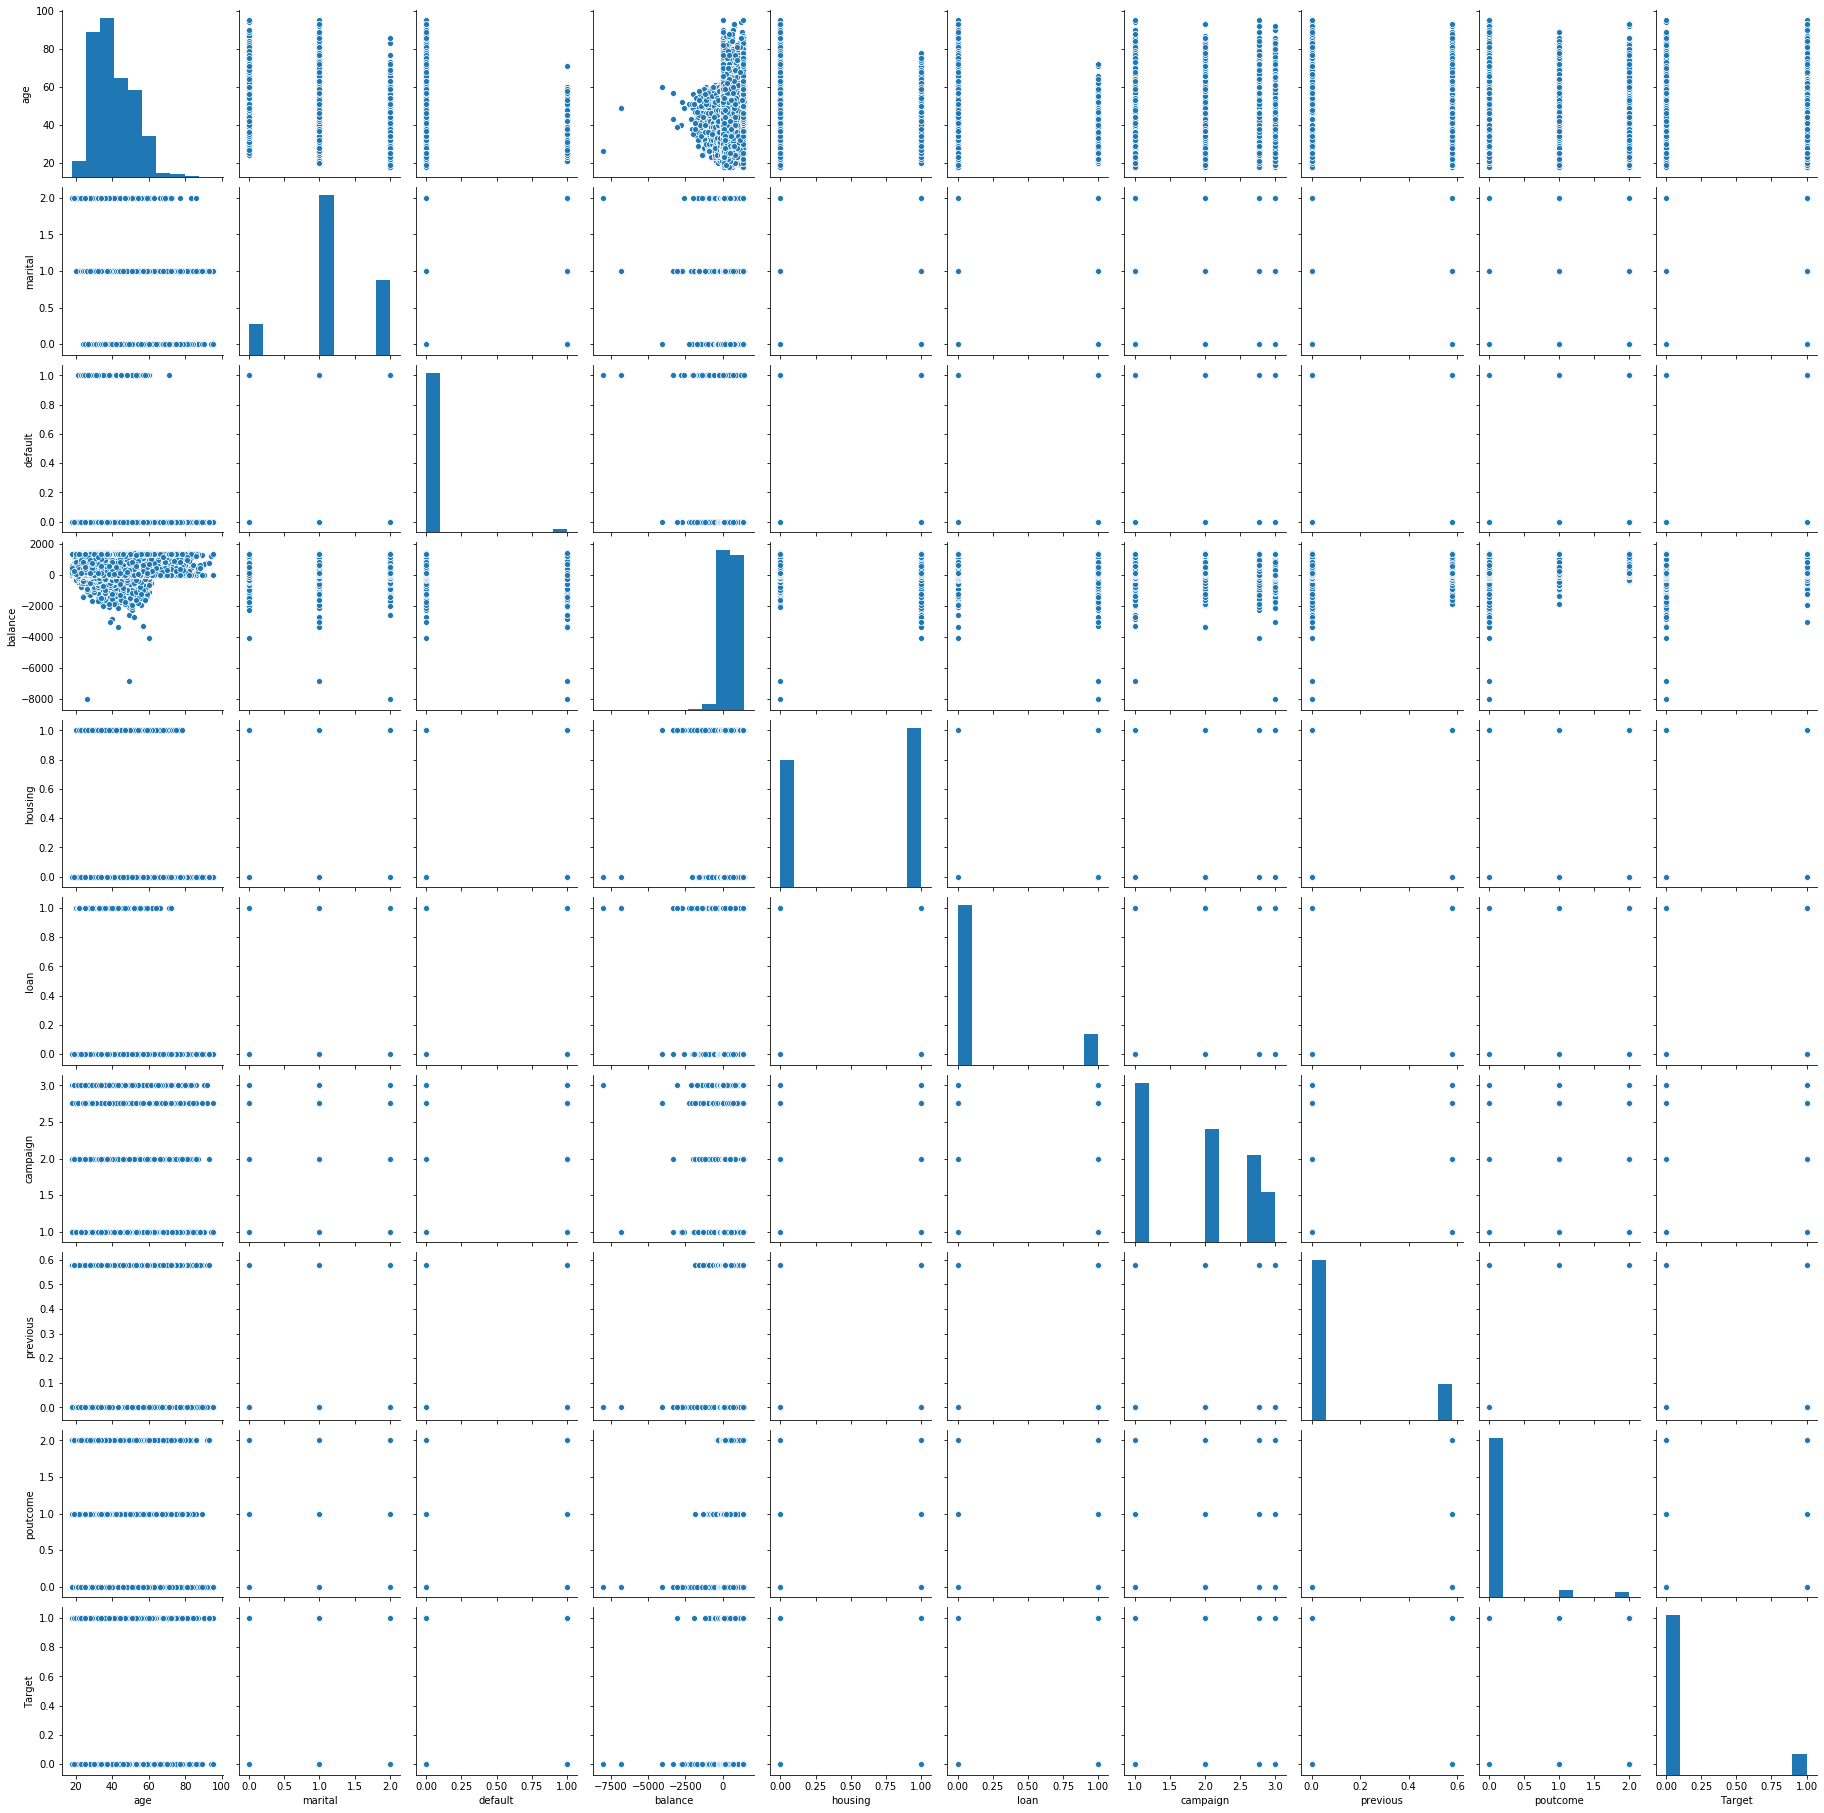

In [131]:
sns.pairplot(df2)

# splitting trainig and testing data

In [132]:
x=df2.drop('Target',axis=1)
y = df2['Target']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# scaling the data

In [133]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# Models

# Logistic regression model 

In [134]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
y_pred=lr.predict(X_test)

In [136]:
lr.score(X_test,y_test)

0.8889708050722501

In [147]:
k = np.array([[58,1,0,1362.272058,1,0,1.0,0.0,0]])
k

array([[5.80000000e+01, 1.00000000e+00, 0.00000000e+00, 1.36227206e+03,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [150]:
k1=sc.transform(k)
k1

array([[ 1.62121349, -0.27292653, -0.13534518,  1.29570939,  0.89263334,
        -0.4264293 , -1.14114399, -0.47523391, -0.26948328]])

In [151]:
lr.predict(k1)

array([0], dtype=int64)

# NAive baiyes


In [152]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nb.score(X_test,y_test)

0.8642730757888528

# KNN

In [163]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)


0.8897080507225007

# SVM

In [164]:
sv=SVC()
sv.fit(X_train,y_train)
sv.score(X_test,y_test)


0.8914774402831024

# Decision tree

In [166]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train,y_train)
dt.score(X_test,y_test)


0.8264523739309938

#  feature importance for decision tree


In [168]:
xvar = df2.drop('Target',axis=1)
x_cols=xvar.columns
features_imp = dt.feature_importances_
features_imp

array([0.26153563, 0.03800656, 0.00434471, 0.44682876, 0.02086064,
       0.02305435, 0.08502403, 0.01908162, 0.1012637 ])